# Economic crisis in the United States in 2007-2009 and its impact on the Polish economy


# Slide #1 Introduction
**Historical background:**

The global economic crisis in the financial and banking markets peaked in 2008-2009, initiated by the collapse of the high-risk mortgage market in the United States.

The immediate cause of the collapse of the functioning of the global financial system since mid-2007 was the boom in mortgages, which were issued by banks in the United States at high risk of repayment to people with insufficient financial capacity (subprime mortgages). These loans became collateral for structured bonds sold en masse for investment and speculative purposes by private financial institutions, including major US and European banks. Awareness of the riskiness of these bonds was low, as the real estate market growth continued and leading rating institutions gave high safety ratings to the bonds in question. Individual insolvency with an unexpectedly high percentage (9.2%), in turn, resulted in a shortage of cash in the credit market and instability (the threat of imminent debt default) for these institutions.

Other reasons were the widespread use of securitization and credit derivatives to distribute risk and the significant participation in market transactions of the exempt, alternative banking system (shadow banking system).

Source: https://pl.wikipedia.org/wiki/Kryzys_finansowy_(2007–2009) 

**Author:** Konrad Gwóźdź

# **Thesis:**


1.   The crisis has caused unemployment to rise and GDP to fall in the United States
2.   Poland has not felt the crisis as severely as the United States


The analysis is based on [data provided by the World Bank](https://www.worldbank.org/en/home), the analysis mainly uses economic and social indicators.

# Clarification of some terms:
**PKB per Capita**

It is the quotient of the value of gross domestic product and the country's population. This measure is used to approximate the standard of living of a country's citizens and allows comparison of living standards with those in other countries.




In [1]:
#@title #Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
#@title Connecting to Gdrive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [3]:
#@title #Data reading
df_data = pd.read_csv('WDIData.csv')
df_country = pd.read_csv('WDICountry.csv')
df_series = pd.read_csv('WDISeries.csv')

sns.set(rc = {'figure.figsize':(20,10)})

df_data = df_data.drop('Unnamed: 65', axis = 1)
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.981256,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#@title Data reorganization
    
#Data organization for the US
usa_country = df_data[df_data['Country Code'] == 'USA']
usa_country_y = usa_country.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name = 'Year', value_name = 'Value')

usa_country_y['Year'] = pd.to_numeric(usa_country_y['Year'])
usa_country_y['Value'] = pd.to_numeric(usa_country_y['Value']) 

#Data organization for PL

pl_country = df_data[df_data['Country Code'] == 'POL']
pl_country_y = pl_country.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name = 'Year', value_name = 'Value')

pl_country_y['Year'] = pd.to_numeric(pl_country_y['Year'])
pl_country_y['Value'] = pd.to_numeric(pl_country_y['Value']) 

years = [1990, 1991, 1992, 1993, 1994, 1995,
         1996, 1997, 1998, 1999, 2000, 2001, 
         2002, 2003, 2004, 2005, 2006, 2007, 
         2008, 2009, 2010, 2011, 2012, 2013, 
         2014, 2015]


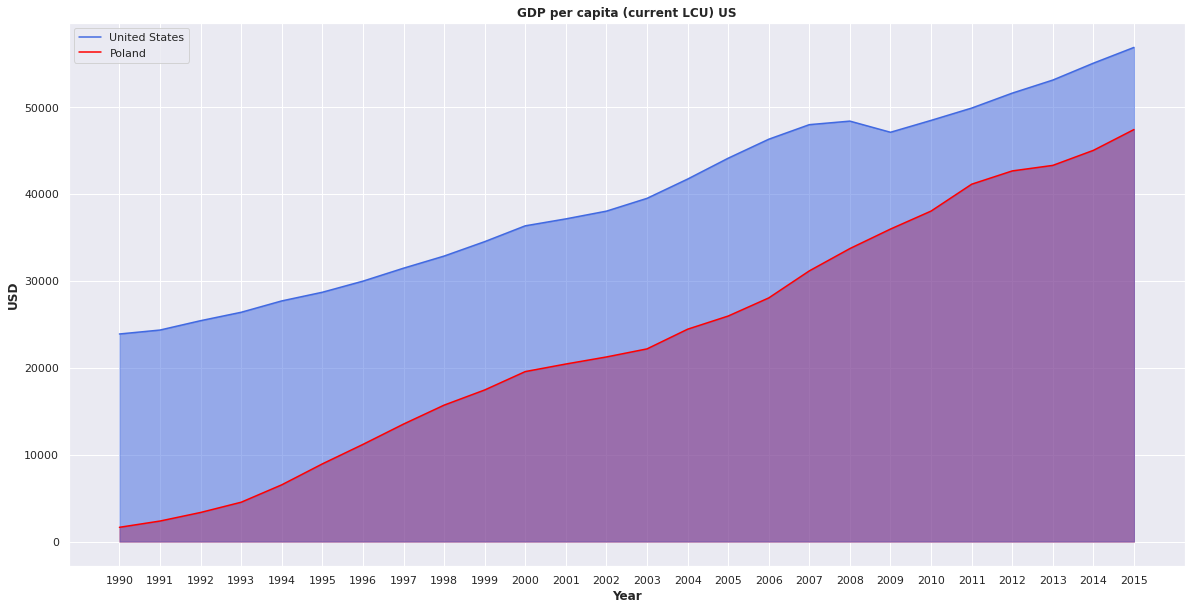

In [5]:
# @title Slide #2 GDP per capita (current LCU).
indicator_lineplot = ['GDP per capita (current LCU)']
lineplot_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_lineplot)]
lineplot_01 = sns.lineplot(data = lineplot_data, x = 'Year', y = 'Value', color = 'royalblue')
lineplot_01.set_xticks(years)



indicator_lineplot_pl = ['GDP per capita (current LCU)']
lineplot_data_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_lineplot_pl)]
pkb_chart_pl =sns.lineplot(data = lineplot_data_pl, x = 'Year', y = 'Value', color = 'red')
pkb_chart_pl .set_xticks(years)


plt.fill_between(years, lineplot_data_pl['Value'], color = 'red', alpha = 0.5)
plt.fill_between(years, lineplot_data ['Value'], color = 'royalblue', alpha = 0.5)

pkb_chart_pl.legend(['United States', 'Poland'])

plt.xlabel('Year', fontweight = 'bold')
plt.ylabel("USD", fontweight = 'bold')
plt.title('GDP per capita (current LCU) US', fontweight = 'bold')

plt.show()

Based on the above chart, we can see that the crisis did not have a significant impact on the **GDP per capita (current LCU)** ratio for both countries.

It is noticeable, a slight decrease in GDP in 2009 for the US, but this did not have major effects in the future.

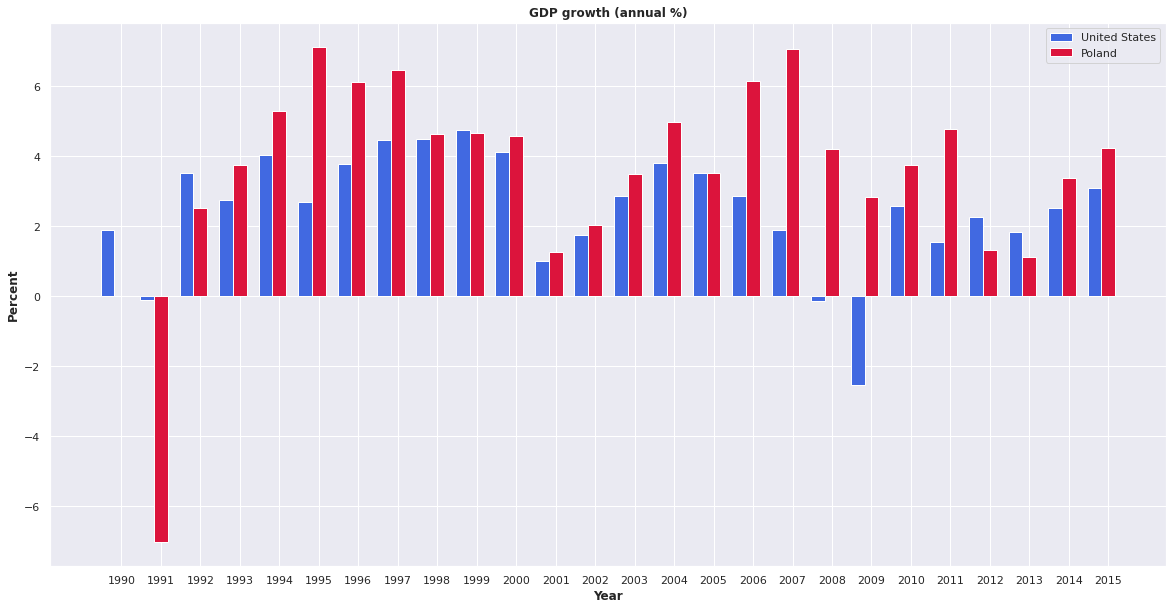

In [6]:
#@title Slide #3 GDP growth (annual %)
indicator_2 = ['GDP growth (annual %)']
lineplot_2_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_2)]
lineplot_2_data_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_2)]
"""
#usa
lineplot_2 = sns.barplot(data = lineplot_2_data, x = 'Year', y = 'Value',  color = 'royalblue', alpha = 0.5)
lineplot_2.set_title('Wzrost PKB (roczny %)')
lineplot_2.set_xticks(years)
plt.ylabel("Procent")
plt.xlabel("Rok")

#polska

lineplot_2_pl = sns.barplot(data = lineplot_2_data_pl, x = 'Year', y = 'Value', color = 'red', alpha = 0.5)

lineplot_2.legend(['Stany Zjednoczone', 'Polska'])
"""

barWidth = 0.35

bars1 = lineplot_2_data['Value']
bars2 = lineplot_2_data_pl['Value']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width = barWidth, color = 'royalblue', edgecolor = 'white', label = 'United States')
plt.bar(r2, bars2, width = barWidth, color = 'crimson', edgecolor = 'white', label = 'Poland')


plt.xlabel('Year', fontweight = 'bold')
plt.ylabel("Percent", fontweight = 'bold')
plt.title('GDP growth (annual %)', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], years)

plt.legend()
plt.show()

In the case of the **GDP Growth (annual %)** indicator, we can see the negative effects of the financial crisis on US GDP, with negative GDP growth percentages noticeable in 2008 and 2009.

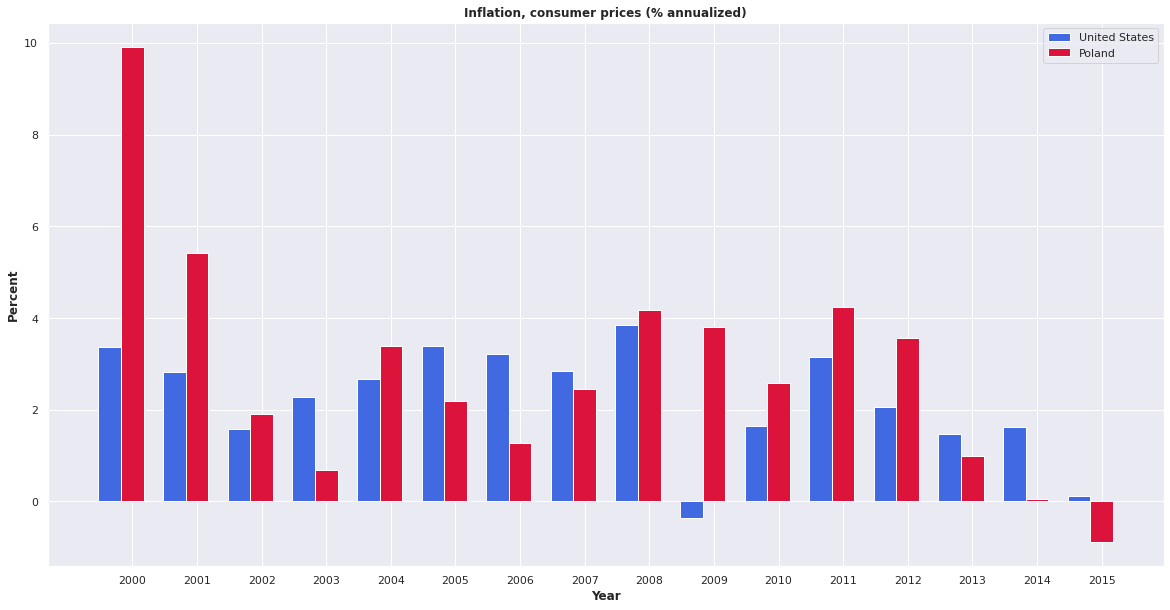

In [7]:
#@title Slide #4 Inflation, consumer prices (% annualized)
indicator_3 = ['Inflation, consumer prices (annual %)']
years_inf =  years[10:]  


lineplot_3_data = usa_country_y.loc[usa_country_y['Year'].isin(years_inf) & usa_country_y['Indicator Name'].isin(indicator_3)]
lineplot_3_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years_inf) & pl_country_y['Indicator Name'].isin(indicator_3)]


barWidth = 0.35


bars_infl_1 = lineplot_3_data['Value']
bars_infl_2 = lineplot_3_data_pl['Value']

r1 = np.arange(len(bars_infl_1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars_infl_1, width = barWidth, color = 'royalblue', edgecolor = 'white', label = 'United States')
plt.bar(r2, bars_infl_2, width = barWidth, color = 'crimson', edgecolor = 'white', label = 'Poland')


plt.xlabel('Year', fontweight = 'bold')
plt.ylabel("Percent", fontweight = 'bold')
plt.title('Inflation, consumer prices (% annualized)', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars_infl_1))], years_inf)

plt.legend()
plt.show()

For the indicator **Inflation, consumer prices (% per year)** we can observe an anomaly. In 2009, the United States achieved negative inflation (deflation).

This was probably the result of state interventionism, in order to alleviate the effects of the financial crisis.

In the case of Poland, we are unable to ascertain any impact of the 2007 - 2009 economic crisis on the state's economy. 






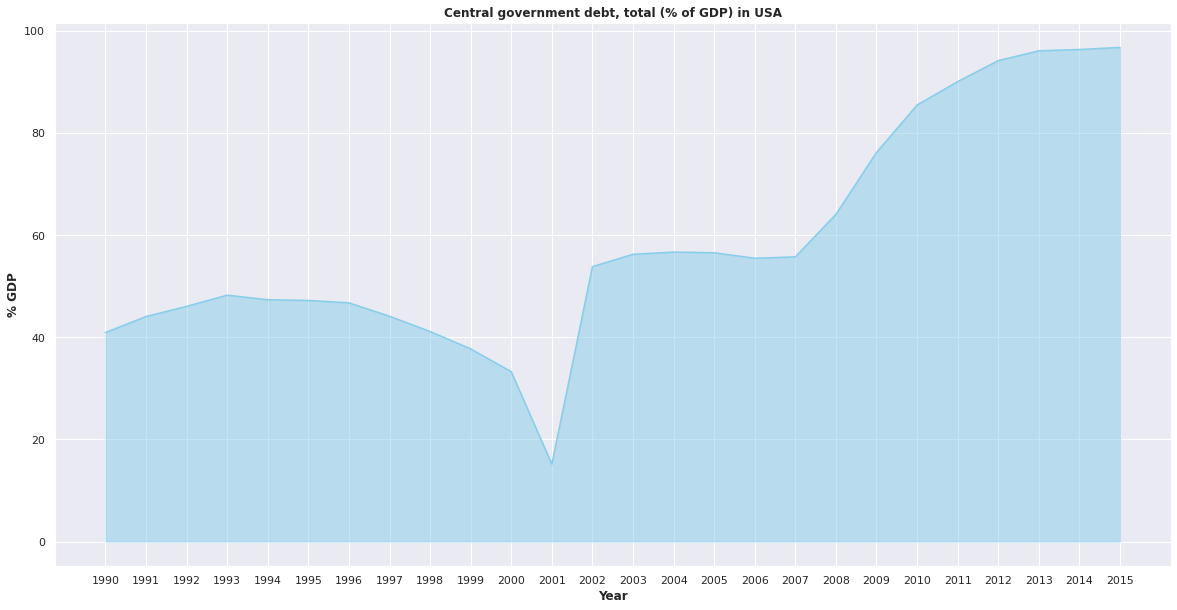

In [14]:
#@title Slide #5 Government debt, total (% of GDP)
indicator_5 = ['Central government debt, total (% of GDP)']
lineplot_5_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_5)]
lineplot_5_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_5)]


lineplot_5 = sns.lineplot(data = lineplot_5_data, x = 'Year', y = 'Value', color = 'skyblue')
lineplot_5_pl = sns.lineplot(data = lineplot_5_data_pl, x = 'Year', y = 'Value', color = 'skyblue')

lineplot_5.set_xticks(years)

plt.fill_between(years, lineplot_5_data['Value'], color = 'Skyblue', alpha = 0.5)

plt.ylabel("% GDP", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Central government debt, total (% of GDP) in USA', fontweight = 'bold')
plt.show()

For the United States, we can see an increase in government debt from 2009 to 2013.

This is a result of the financial crisis, as the state during this time sharply increased financial outlays to contain the effects of the crisis, so they were forced to borrow more money.

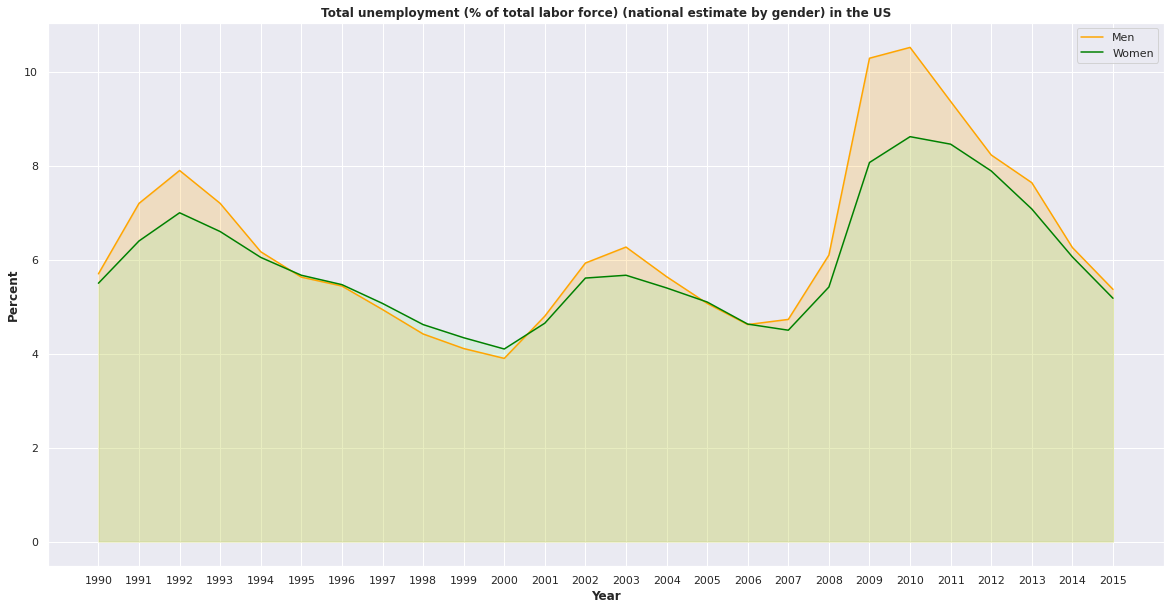

In [15]:
#@title Slide #6 Total unemployment (% of total labor force) (national estimate by gender)
unemp_plot_ind = ['Unemployment, total (% of total labor force) (national estimate)']
unemp_plot_ind_male = ['Unemployment, male (% of male labor force) (national estimate)']
unemp_plot_ind_female = ['Unemployment, female (% of female labor force) (national estimate)']
unemp_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind)]
unemp_data_male= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind_male)]
unemp_data_female= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind_female)]

male = unemp_data_male[['Value', 'Year']] 
female = unemp_data_female[['Value', 'Year']] 
time = male['Year']

male_grb = male.groupby(['Year'], as_index = False).mean()
female_grb = female.groupby(['Year'], as_index = False).mean()

male = male_grb['Value']
female = female_grb['Value']


plt.fill_between(years, male, 0, color = 'orange', alpha = 0.2)
plt.fill_between(years, female, 0, color = 'lightgreen', alpha = 0.2)
chart = sns.lineplot(data = male_grb, x = 'Year', y = 'Value', color = 'orange', markers=True, label = 'Men')
chart = sns.lineplot(data = female_grb, x = 'Year', y = 'Value', color = 'green', markers=True, label = 'Women')
chart.set_xticks(years)
plt.ylabel("Percent", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Total unemployment (% of total labor force) (national estimate by gender) in the US', fontweight = 'bold')


plt.legend()
plt.show()

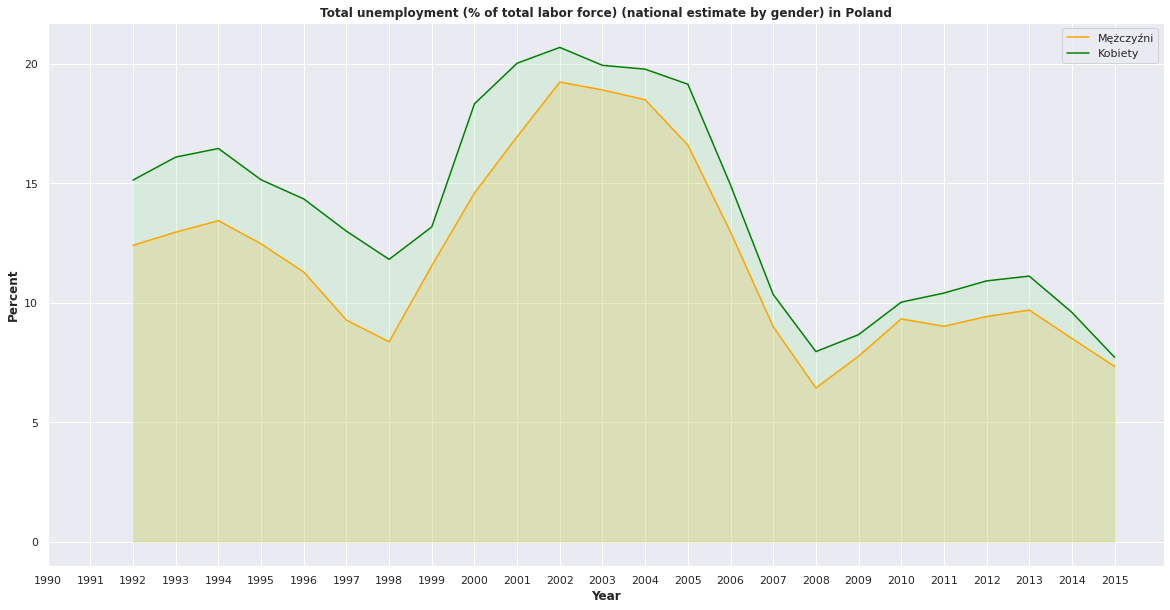

In [16]:
#@title #
unemp_plot_ind = ['Unemployment, total (% of total labor force) (national estimate)']
unemp_plot_ind_male = ['Unemployment, male (% of male labor force) (national estimate)']
unemp_plot_ind_female = ['Unemployment, female (% of female labor force) (national estimate)']

unemp_data_pl= pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind)]
unemp_data_male_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind_male)]
unemp_data_female_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind_female)]

male_pl = unemp_data_male_pl[['Value', 'Year']] 
female_pl = unemp_data_female_pl[['Value', 'Year']] 
time = male_pl['Year']

male_grb_pl = male_pl.groupby(['Year'], as_index = False).mean()
female_grb_pl = female_pl.groupby(['Year'], as_index = False).mean()

male_pl = male_grb_pl['Value']
female_pl = female_grb_pl['Value']


plt.fill_between(years, male_pl, 0, color = 'orange', alpha = 0.2)
plt.fill_between(years, female_pl, 0, color = 'lightgreen', alpha = 0.2)
chart = sns.lineplot(data = male_grb_pl, x = 'Year', y = 'Value', color = 'orange', markers=True, label = 'Men')
chart = sns.lineplot(data = female_grb_pl, x = 'Year', y = 'Value', color = 'green', markers=True, label = 'Women')
chart.set_xticks(years)
plt.ylabel("Percent", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Total unemployment (% of total labor force) (national estimate by gender) in Poland', fontweight = 'bold')


plt.legend()
plt.show()

In the context of unemployment, we can see the negative impact of the 2007 - 2009 financial crisis on the United States.

In 2009, we can observe that about 10% of men and 8% of women were unemployed, probably due to the numerous liquidations of companies and businesses during this period (mainly the financial sector).

Leaving aside the issue of the crisis, we can observe a difference in the percentage of unemployment by gender (in Poland, many more women were out of work). This may be due to the social conditioning of the traditional family model, where the man should work and the woman should take care of the home.

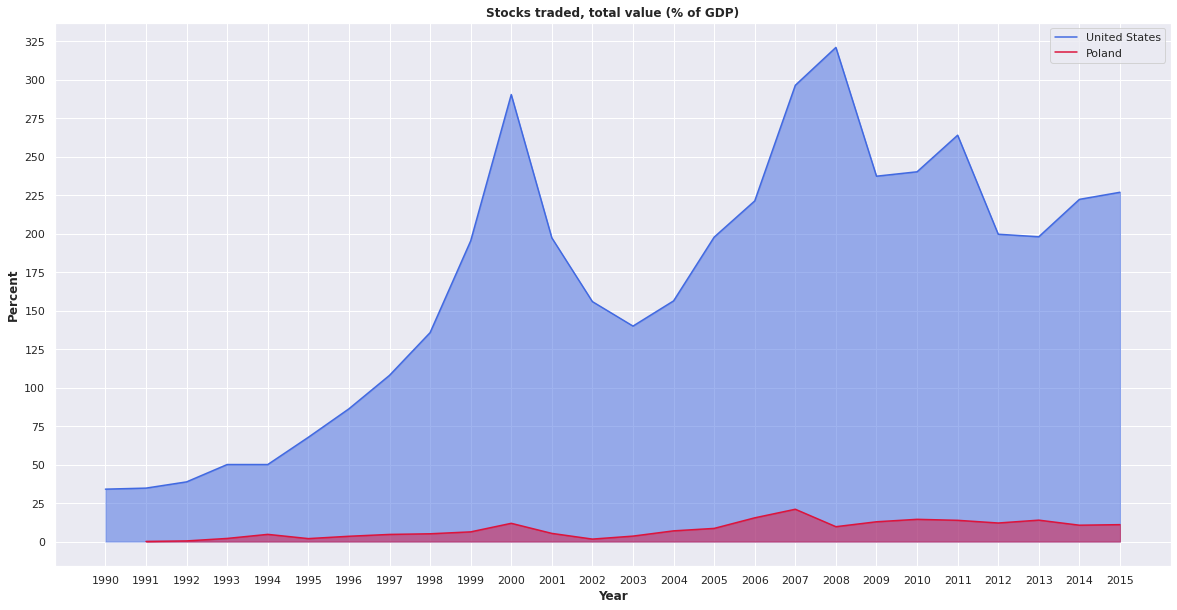

In [17]:
#@title Slide #7 Stock market turnover, total value (% of GDP)

stocks_ind = ['Stocks traded, total value (% of GDP)']
lineplot_9_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(stocks_ind)]
lineplot_9_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(stocks_ind)]

lineplot_8 = sns.lineplot(data = lineplot_9_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'United States')
lineplot_8 = sns.lineplot(data = lineplot_9_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Poland')


lineplot_8.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_8.set_xticks(years)

plt.ylabel("Percent", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Stocks traded, total value (% of GDP)', fontweight = 'bold')

plt.fill_between(years, lineplot_9_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_9_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

In the case of stock market turnover, for the United States it is possible to observe the negative effects of the crisis,that is, declines on the chart starting from 2008.

For Poland, one can observe a drop of 10% from 2007 to 2008, which is about 50% of the total stock market turnover. In contrast to the United States, one can later observe a gradual increase for stock market turnover.

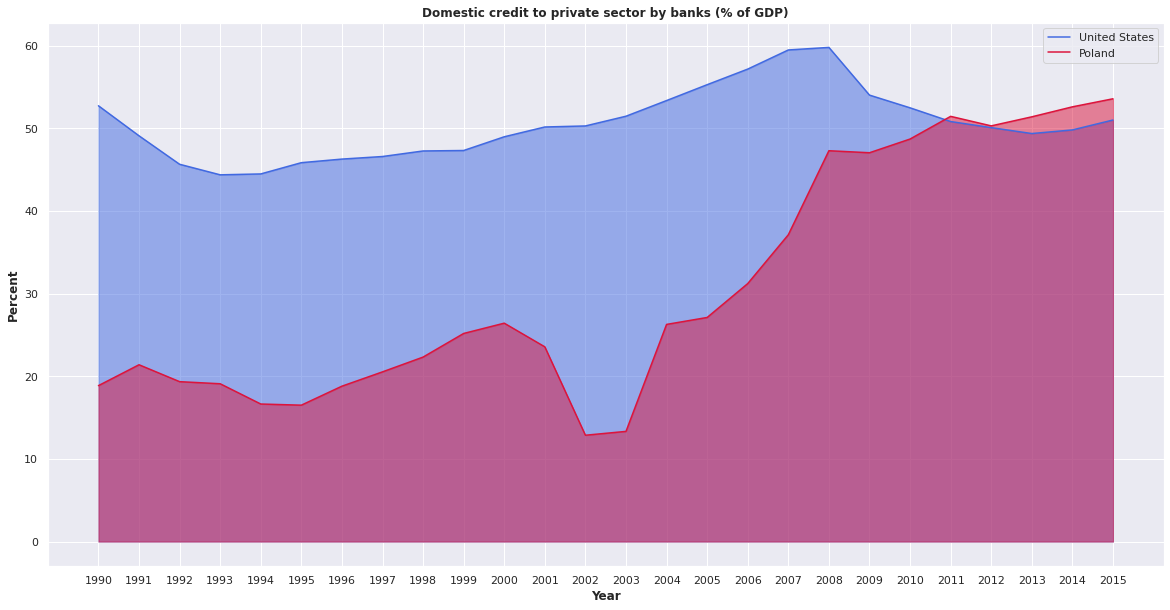

In [18]:
#@title Slide #8 Domestic credit to private sector by banks (% of GDP)
loan_ind = ['Domestic credit to private sector by banks (% of GDP)']
lineplot_9_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(loan_ind)]
lineplot_9_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(loan_ind)]

lineplot_9 = sns.lineplot(data = lineplot_9_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'United States')
lineplot_9 = sns.lineplot(data = lineplot_9_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Poland')


#lineplot_9.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_9.set_xticks(years)

plt.ylabel("Percent", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Domestic credit to private sector by banks (% of GDP)', fontweight = 'bold')

plt.fill_between(years, lineplot_9_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_9_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

In the case of lending to the private sector by banks, we can see that in the case of the United States, the financial crisis caused a decline (5% within the first year, the lowest ceiling of ~50% reached in 2013).

For Poland, we can see an increase in domestic lending by banks during this period, so we can conclude that the financial crisis did not have a negative impact in this perspective.

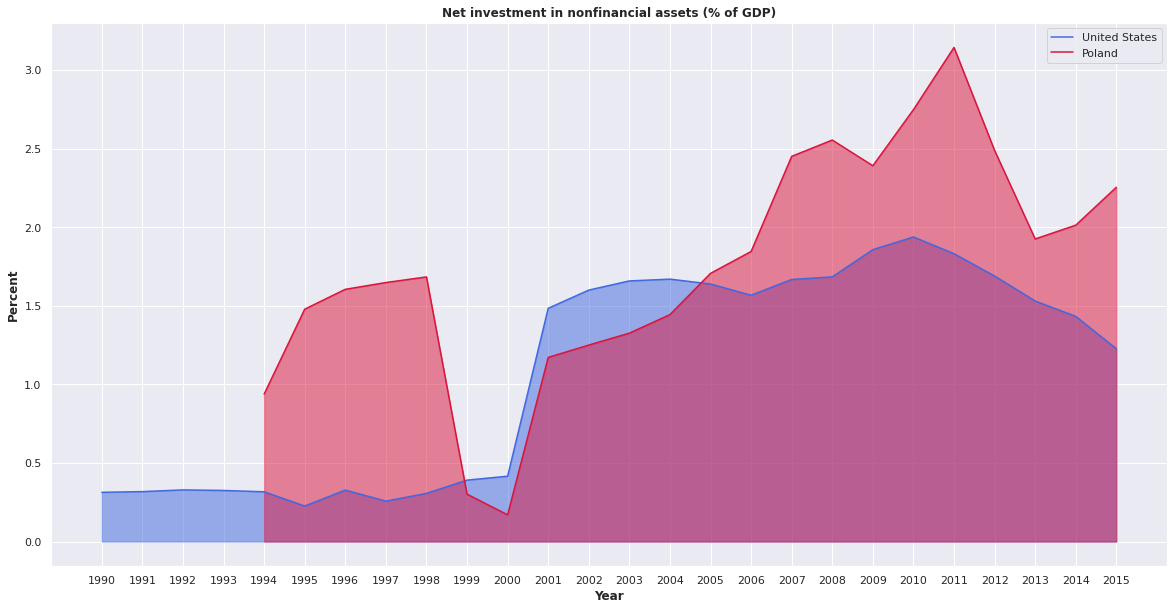

In [20]:
#@title Slide #9 Net investment in non-financial assets (% of GDP)

ind_10 = ['Net investment in nonfinancial assets (% of GDP)']
lineplot_10_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(ind_10)]
lineplot_10_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(ind_10)]

lineplot_10 = sns.lineplot(data = lineplot_10_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'United States')
lineplot_10 = sns.lineplot(data = lineplot_10_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Poland')


#lineplot_10.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_10.set_xticks(years)

plt.ylabel("Percent", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.title('Net investment in nonfinancial assets (% of GDP)', fontweight = 'bold')

plt.fill_between(years, lineplot_10_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_10_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

For net investment in non-financial assets, we are unable to observe specific changes over time, or after the financial crisis.
For the United States, we can see a downward trend since 2010, while in Poland we can already see an upward trend since 2005, until 2011.

# Slide #10 Summary

Based on the above metrics, I believe I have succeeded in supporting my thesis. In summary, the financial crisis in the United States 2007 - 2009, had a negative impact on the United States, while we are not able to observe the same relationship for Poland.
